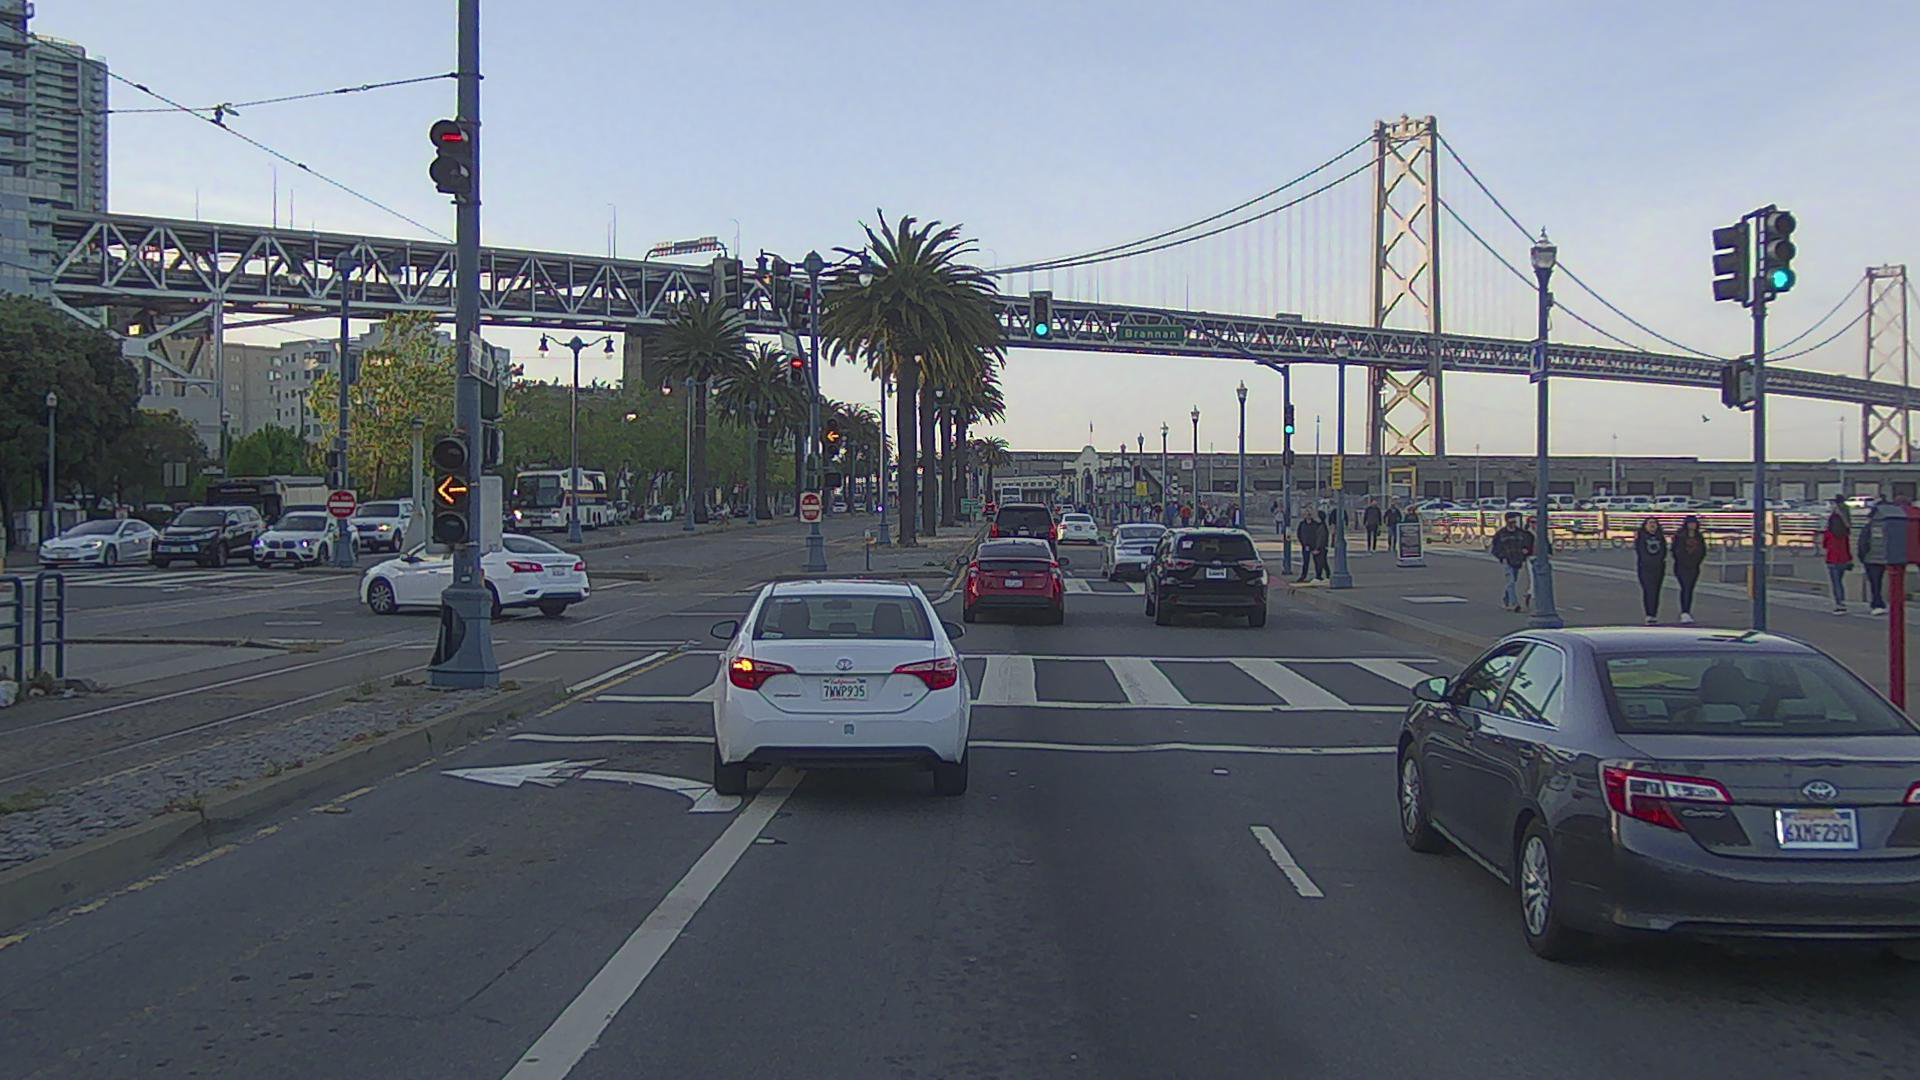

In [1]:
from transformers import pipeline
from PIL import Image
import requests

path = "/zfs/penshorn/master_thesis/datasets/raw/PandaSet/011/camera/front_camera/00.jpg"
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(path)
image



In [2]:
panoptic_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-panoptic")
semantic_segmentation = pipeline("image-segmentation", "facebook/mask2former-swin-large-cityscapes-semantic")
results_semantic = semantic_segmentation(image)
results = panoptic_segmentation(image)
results_semantic

config.json:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

`label_ids_to_fuse` unset. No instance will be fused.
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999815,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': 0.999867,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': 0.999652,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': 0.981657,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': 0.997579,
  'label': 'truck',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': 0.999481,
  'label': 'traffic light',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': 0.997689,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': 0.964451,
  'label': 'fence',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': 0.999956,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': 0.99993,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>}

ValueError: Could not save to JPEG for display

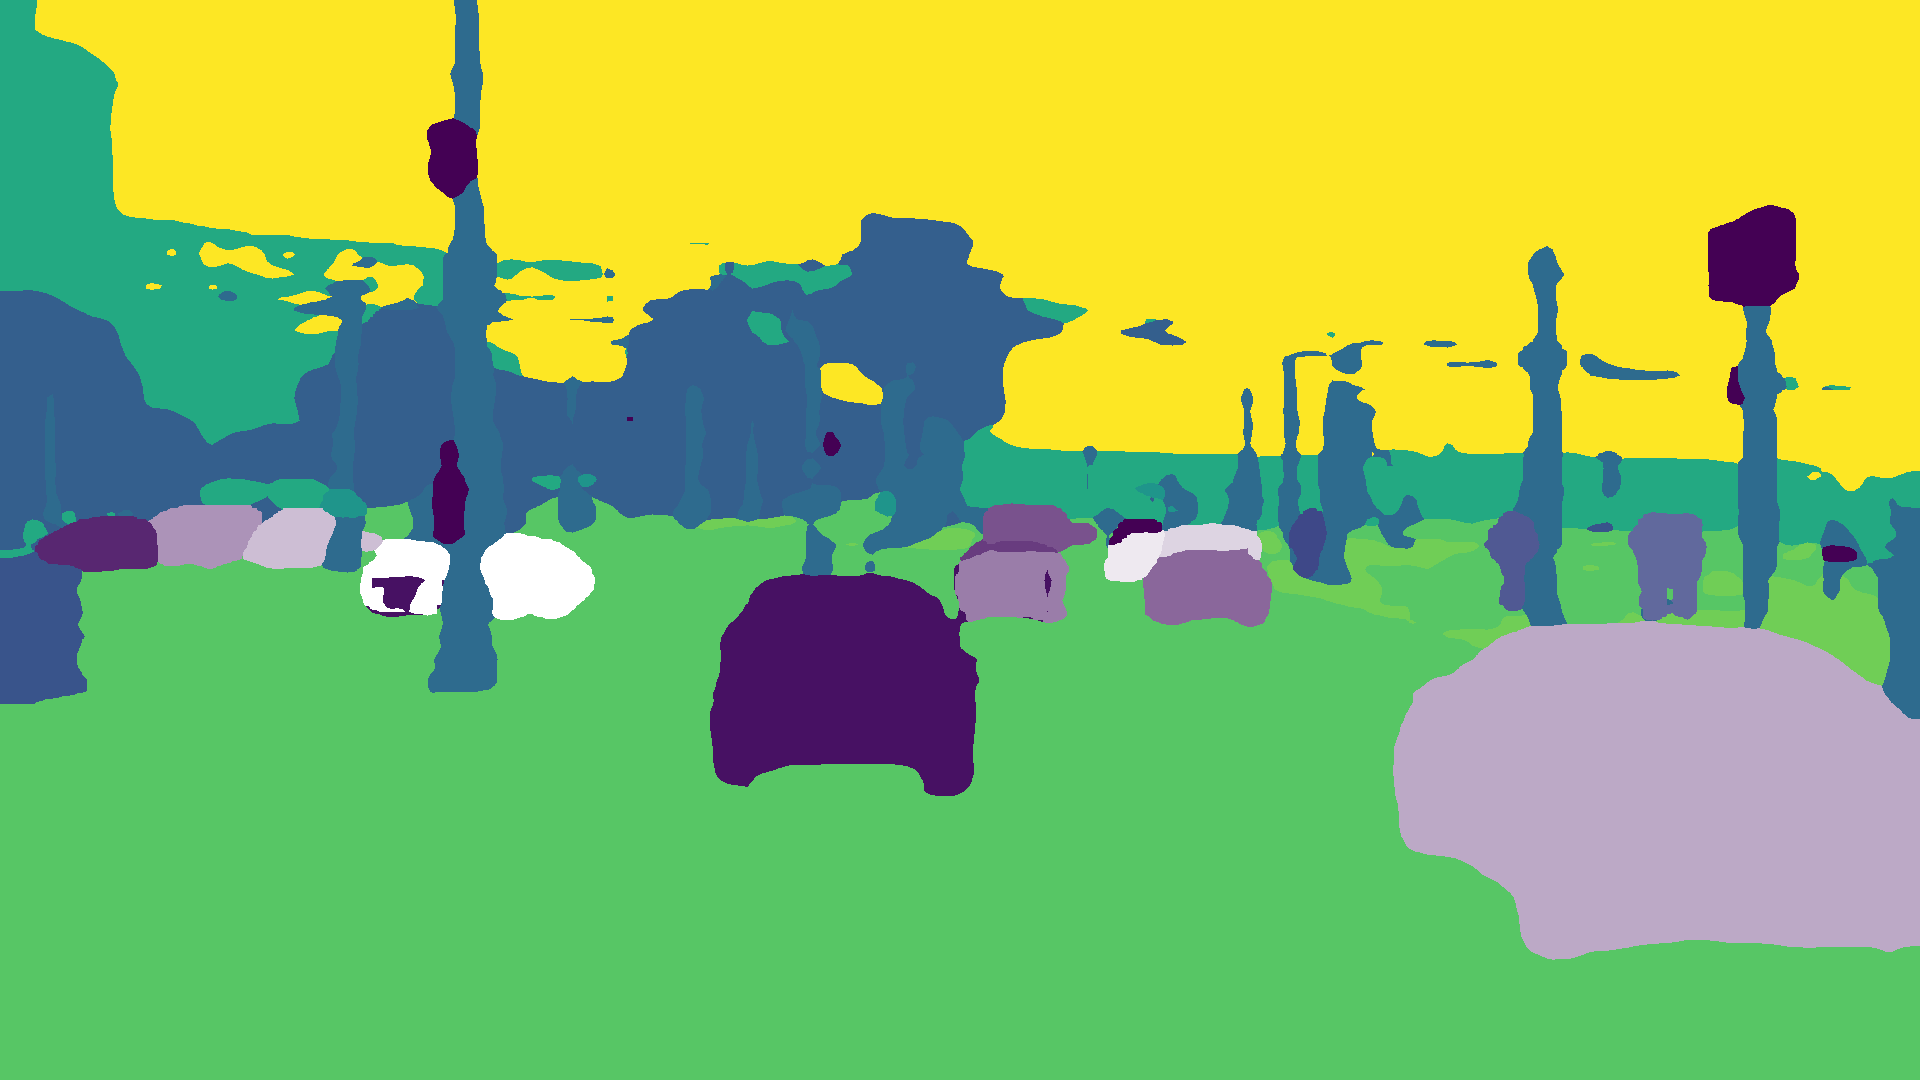

In [3]:
import matplotlib.pyplot as plt
import numpy as np

cmap = plt.get_cmap('viridis', len(results))
panoptic_map_class = np.zeros((image.size[1], image.size[0]), dtype=np.uint8)
panoptic_map_instance = np.zeros((image.size[1], image.size[0]), dtype=np.uint8)

label_dict = dict()

mask: Image = results[0]['mask']
mask_np = np.array(mask)

# TODO: Add mapping for classes

for i, result in enumerate(results):
    # TODO: Save instance in alpha channel
    if result['label'] not in label_dict:
        label_dict[result['label']] = {'id': i, 'instance': 0}
    else:
        label_dict[result['label']]['instance'] += 1
    panoptic_map_class[np.array(result['mask']) > 0] = label_dict[result['label']]['id']
    panoptic_map_instance[np.array(result['mask']) > 0] = label_dict[result['label']]['instance']

max_instance = max([label_dict[label]['instance'] for label in label_dict])

# Apply the colormap to the normalized panoptic map
colored_map = cmap(panoptic_map_class, alpha=1-panoptic_map_instance/max_instance, bytes=True)

# Convert the colored map to an image. Multiply by 255 to convert it back to the range [0, 255]
colored_image = Image.fromarray(colored_map)

# Display the image
colored_image

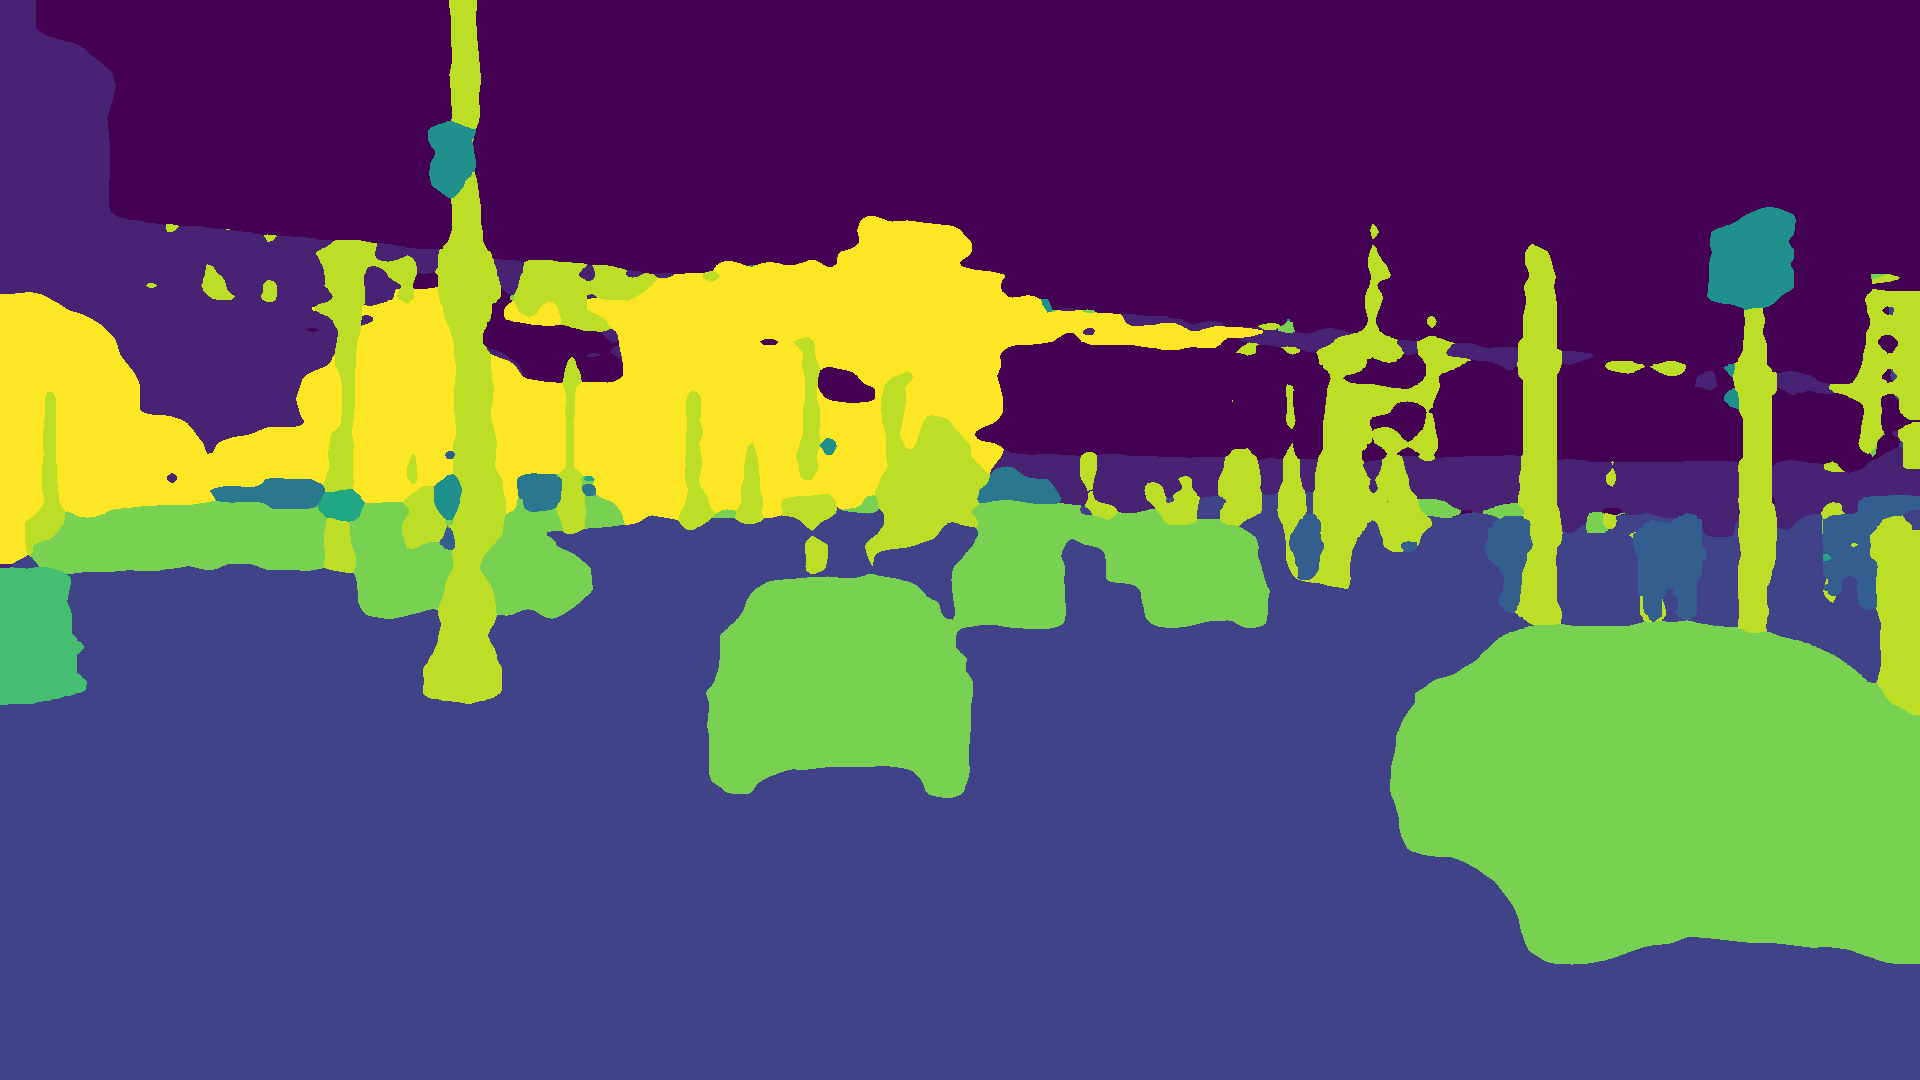

In [8]:
cmap_semantic = plt.get_cmap('viridis', len(results_semantic))
semantic_map = np.zeros((image.size[1], image.size[0]), dtype=np.uint8)

for i, result in enumerate(results_semantic):
    semantic_map[np.array(result['mask']) > 0] = i

colored_semantic_map = cmap_semantic(semantic_map, bytes=True)

colored_semantic_image = Image.fromarray(colored_semantic_map[:, :, :3], mode='RGB')

colored_semantic_image